<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/xai_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os
import keras
import cv2
import matplotlib.pyplot as plt
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import SGD
from skimage.segmentation import mark_boundaries
from xml.etree import ElementTree

Using TensorFlow backend.


In [5]:
saved_model = load_model('/content/drive/My Drive/xai_model/LG_model.h5')














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
annotation = '/content/drive/My Drive/NEU surface defect database - test split/ANNOTATIONS/patches_167.xml'
image_path = "/content/drive/My Drive/NEU surface defect database - test split/Test/Pa/Pa_167.bmp"

In [0]:
labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}

In [0]:
# shap_Cr = '/content/drive/My Drive/NEU surface defect database - test split/Train/Cr/*.bmp'
# shap_In = '/content/drive/My Drive/NEU surface defect database - test split/Train/In/*.bmp'
# shap_PS = '/content/drive/My Drive/NEU surface defect database - test split/Train/PS/*.bmp'
# shap_Pa = '/content/drive/My Drive/NEU surface defect database - test split/Train/Pa/*.bmp'
# shap_RS = '/content/drive/My Drive/NEU surface defect database - test split/Train/RS/*.bmp'
# shap_Sc = '/content/drive/My Drive/NEU surface defect database - test split/Train/Sc/*.bmp'

# shap_data = [shap_Cr, shap_In, shap_PS, shap_Pa, shap_RS, shap_Sc]

In [0]:
shap_Cr = '/content/drive/My Drive/NEU orig/Cr/*.bmp'
shap_In = '/content/drive/My Drive/NEU orig/In/*.bmp'
shap_PS = '/content/drive/My Drive/NEU orig/PS/*.bmp'
shap_Pa = '/content/drive/My Drive/NEU orig/Pa/*.bmp'
shap_RS = '/content/drive/My Drive/NEU orig/RS/*.bmp'
shap_Sc = '/content/drive/My Drive/NEU orig/Sc/*.bmp'

shap_data = [shap_Cr, shap_In, shap_PS, shap_Pa, shap_RS, shap_Sc]

[[7.9911124e-06 3.1725485e-06 3.2944768e-06 9.9993241e-01 2.4388757e-05
  2.8701728e-05]]
[3]
Patches


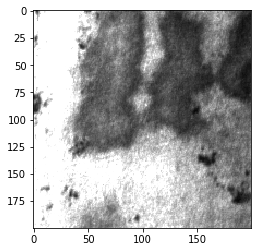

In [160]:
img = image.load_img(image_path, target_size=(200,200))
plt.imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255
result = saved_model.predict(img)
print(result)

prediction = result.argmax(axis=-1)
print(prediction)

output = labels[int(prediction)]
print(output)

[[39, 1, 102, 132], [108, 1, 165, 115], [168, 1, 200, 85], [176, 154, 200, 180], [149, 126, 170, 145]]


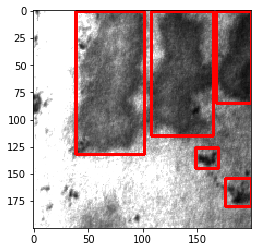

In [161]:
b_img = cv2.imread(image_path)

def extract_boxes(filename):
	tree = ElementTree.parse(filename)
	root = tree.getroot()	
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	return boxes 

boxes = extract_boxes(annotation)
print(boxes)

for i in range(len(boxes)):
  pt1 = boxes[i][0], boxes[i][1]
  pt2 = boxes[i][2], boxes[i][3]
  #print(pt1, pt2)
  cv2.rectangle(b_img, pt1, pt2, (255, 0, 0), 2)
  plt.imshow(b_img)

In [66]:
!pip install shap

In [0]:
# %%time
# import glob
# cv_img = []

# for i in range(len(shap_data)):
#   for ig in glob.glob(shap_data[i]):
#     n = cv2.imread(ig)
#     cv_img.append(n)

# shap_background = np.array(cv_img)

# np.save('/content/drive/My Drive/XAI_results/shap_background_all.npy', shap_background)


In [0]:
# shap_background = np.load('/content/drive/My Drive/XAI_results/shap_background_all.npy')
# shap_background.shape

shap_background_train = np.load('/content/drive/My Drive/XAI_results/shap_background_train.npy')

In [0]:
image_path = "/content/drive/My Drive/NEU surface defect database - test split/Test/Pa/Pa_167.bmp"

(1, 200, 200, 3)

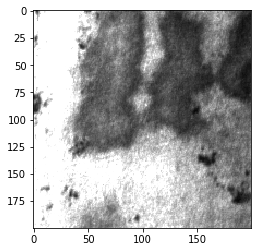

In [135]:
shap_test = image.load_img(image_path) #, grayscale=True)
plt.imshow(shap_test)

shap_test = image.img_to_array(shap_test)
shap_test = np.expand_dims(shap_test, axis=0)
# shap_test /= 255
# shap_test = preprocess_input(shap_test)
shap_test.shape

In [241]:
# for i in range(len(saved_model.layers)):
#   print(i , saved_model.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7f371c77dc18>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f371c77dc88>
2 <keras.layers.convolutional.Conv2D object at 0x7f371c77dcc0>
3 <keras.layers.normalization.BatchNormalization object at 0x7f371c77dd68>
4 <keras.layers.advanced_activations.ReLU object at 0x7f371af00128>
5 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f371af00160>
6 <keras.layers.normalization.BatchNormalization object at 0x7f371af001d0>
7 <keras.layers.advanced_activations.ReLU object at 0x7f371af004a8>
8 <keras.layers.convolutional.Conv2D object at 0x7f371af004e0>
9 <keras.layers.normalization.BatchNormalization object at 0x7f371af00668>
10 <keras.layers.advanced_activations.ReLU object at 0x7f371af00780>
11 <keras.layers.convolutional.ZeroPadding2D object at 0x7f371af007b8>
12 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f371af007f0>
13 <keras.layers.normalization.BatchNormalization object at 0x7f371af00860>
14 <keras.layers.

In [0]:
# test_input = np.load('/content/drive/My Drive/xai_model/grad_test_input.npy')

CPU times: user 48.4 s, sys: 2min 18s, total: 3min 6s
Wall time: 3min 7s


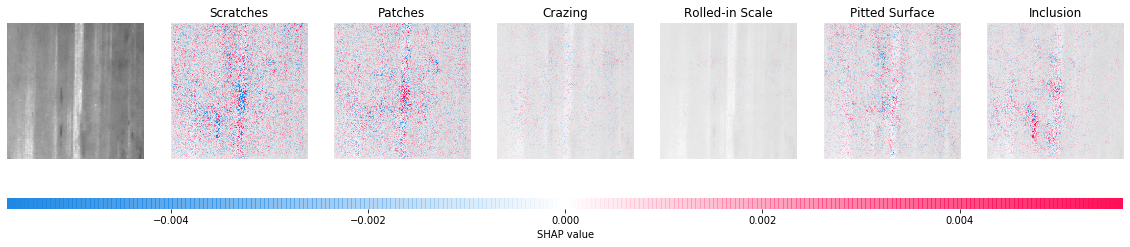

In [284]:
%%time
import keras.backend as K
import shap
m = 1

def map2layer(x, layer):
  feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
  return K.get_session().run(saved_model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output),
                           map2layer(shap_background_train.copy(),m), local_smoothing = 0)    #shap_background.copy()  shap_background_train.copy()

shap_values, indexes = e.shap_values(map2layer(shap_test, m), ranked_outputs=6)

index_names = np.vectorize(lambda l: labels[l])(indexes)

shap.image_plot(shap_values, shap_test, index_names, show=False)
# plt.savefig('/content/drive/My Drive/xai_model/shap.jpg')

In [187]:
indexes

array([[3, 5, 2, 0, 4, 1]])

In [188]:
labels[0]

'Crazing'

In [189]:
len(shap_values)

6

In [0]:
q = shap_values[0]

In [292]:
q.shape

(1, 200, 200, 3)

In [257]:
sv = shap_values[0][0].sum(-1)
svs = (sv).shape
svs

(100, 100)

In [212]:
len(shap_values[0][0].shape)

3

In [194]:
shap_values[0].shape

(1, 12, 12, 512)

In [195]:
(shap_values[0].sum(-1)).shape    # row sum

(1, 12, 12)

In [0]:
abs_vals = np.abs(shap_values[0].sum(-1))

In [197]:
abs_vals.shape

(1, 12, 12)

In [0]:
max_val = np.nanpercentile(abs_vals, 99.9)

In [85]:
max_val

0.019374217178683886

In [86]:
sv.max()

0.026496303123439036

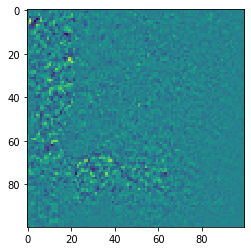

In [258]:
plt.imshow(sv)

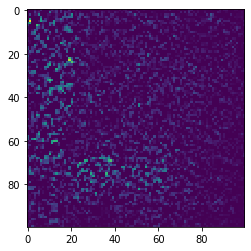

In [259]:
sv_p = np.zeros(sv.shape)
for i in range(sv.shape[0]):
  for j in range(sv.shape[1]):
    if sv[i][j] < 0:
      sv_p[i][j] = 0
    else:
      sv_p[i][j] = sv[i][j]

plt.imshow(sv_p)

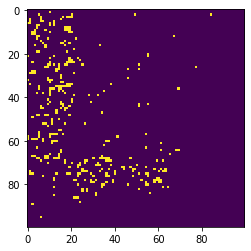

In [260]:
sv_p = sv_p / np.amax(sv_p)

for i in range(sv_p.shape[0]):
  for j in range(sv_p.shape[1]):
    if sv_p[i][j] > 0.25:
      sv_p[i][j] = 1
    else:
      sv_p[i][j] = 0

plt.imshow(sv_p)

In [261]:
sv_p.shape

(100, 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


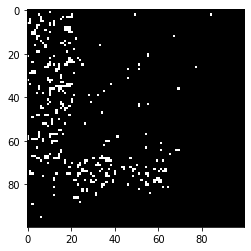

In [262]:
shap_mask = np.zeros((sv_p.shape[0],sv_p.shape[1],3))
# shap_img = cv2.imread(image_path)
for i in range(svs[0]):
  for j in range(svs[1]):
    if sv_p[i][j] == 1:
      shap_mask[i][j] = 255
    else:
      shap_mask[i][j] = 0

plt.imshow(shap_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


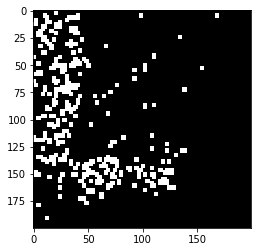

In [263]:
shap_mask_r = cv2.resize(shap_mask, (200, 200))
plt.imshow(shap_mask_r)

In [264]:
shap_mask_r.shape

(200, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


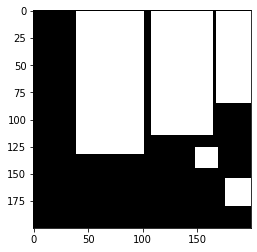

In [265]:
gt_mask = np.zeros(b_img.shape)

for l in range(len(boxes)):
  for i in range(boxes[l][1], boxes[l][3]):
    for j in range(boxes[l][0], boxes[l][2]):
      gt_mask[i][j] = 255 

plt.imshow(gt_mask)

In [0]:
# gt_mask_r = cv2.resize(gt_mask, (shap_mask.shape[0],shap_mask.shape[1]))

In [239]:
# intersection=[]
# union=[]

# intersection = np.logical_and(gt_mask_r, shap_mask)
# union = np.logical_or(gt_mask_r, shap_mask)
# iou_score = np.sum(intersection) / np.sum(union)
# print("SHAP IOU: ",iou_score)

SHAP IOU:  0.39325842696629215


In [266]:
intersection=[]
union=[]

intersection = np.logical_and(gt_mask, shap_mask_r)
union = np.logical_or(gt_mask, shap_mask_r)
iou_score = np.sum(intersection) / np.sum(union)
print("SHAP IOU: ",iou_score)

SHAP IOU:  0.027858703568827387


In [0]:
# DATASET_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/Test'
# CLASSES = ['Cr', 'In', 'PS', 'Pa', 'RS', 'Sc']

# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(DATASET_ROOT,
#                                                     class_mode='categorical',
#                                                     #interpolation='bilinear',
#                                                     target_size=(200, 200),
#                                                     batch_size=180,
#                                                     shuffle=False,
#                                                     classes=CLASSES)
# unique, counts = np.unique(test_generator.labels, return_counts=True)
# print(dict(zip(CLASSES, counts)))

In [0]:
# test_input,y = test_generator.next()
# print(test_input.shape)

#cur_batch_sz = 180

In [0]:
# # np.save('/content/drive/My Drive/xai_model/shap_test_input',test_input)
# test_input = np.load('/content/drive/My Drive/xai_model/shap_test_input.npy')

In [0]:
# test_crazing_idx = np.full(len(test_generator.filenames),False)
# test_inclusion_idx = np.full(len(test_generator.filenames),False)
# test_pitted_surface_idx = np.full(len(test_generator.filenames),False)
# test_patches_idx = np.full(len(test_generator.filenames),False)
# test_rolledin_scale_idx = np.full(len(test_generator.filenames),False)       
# test_scratches_idx = np.full(len(test_generator.filenames),False)  
# for i in range(len(test_generator.filenames)):
#     for j in range(len(test_generator.filenames[i])):
#         if test_generator.filenames[i][j]== "/":
#             break
#     correct_class = test_generator.filenames[i][0:j]
#     if correct_class == "Cr":
#         test_crazing_idx[i] = True
#     if correct_class == "In":
#         test_inclusion_idx[i] = True
#     if correct_class == "PS":
#         test_pitted_surface_idx[i] = True
#     if correct_class == "Pa":
#         test_patches_idx[i] = True
#     if correct_class == "RS":
#         test_rolledin_scale_idx[i] = True
#     if correct_class == "Sc":
#         test_scratches_idx[i] = True

# # print(len(test_input[test_crazing_idx]))
# # print(len(test_input[test_inclusion_idx]))
# # print(len(test_input[test_pitted_surface_idx]))
# # print(len(test_input[test_patches_idx]))
# # print(len(test_input[test_rolledin_scale_idx]))
# # print(len(test_input[test_scratches_idx]))

In [0]:
# plt.imshow(test_input[test_crazing_idx][16])

# # shap_test = np.expand_dims(test_input[test_rolledin_scale_idx][25], axis=0)

In [0]:
# len(test_files)

In [0]:
# shap_test = [None]*len(test_files)
# for i in range(len(test_files)):
#   shap_test[i] = image.load_img(test_files[i])  
#   shap_test[i] = image.img_to_array(shap_test[i])
#   shap_test[i] = np.expand_dims(shap_test[i], axis=0)  

In [0]:
# shap_background_train = np.load('/content/drive/My Drive/XAI_results/shap_background_train.npy')
# shap_background_train.shape

In [0]:
# import keras.backend as K
# import shap
# m = 16
# shap_map = []

# def map2layer(x, layer):
#   feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
#   return K.get_session().run(saved_model.layers[layer].input, feed_dict)

# e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output),
#                         map2layer(shap_background_train.copy(),m), local_smoothing = 0)       #shap_background_all.copy()

# for input_imgs in range(len(shap_test)):
#   shap_values, indexes = e.shap_values(map2layer(shap_test[input_imgs], m), ranked_outputs=6)

#   index_names = np.vectorize(lambda l: labels[l])(indexes)
#   # shap.image_plot(shap_values, shap_test, index_names)
#   u = list(indexes[0]).index(Idx)
#   sv = shap_values[u][0].sum(-1)
#   # svs = (sv).shape

#   sv_p = np.zeros(sv.shape)
#   for i in range(sv.shape[0]):
#     for j in range(sv.shape[1]):
#       if sv[i][j] < 0:
#         sv_p[i][j] = 0
#       else:
#         sv_p[i][j] = sv[i][j]

#   sv_p = sv_p / np.amax(sv_p)
#   for i in range(sv_p.shape[0]):
#     for j in range(sv_p.shape[1]):
#       if sv_p[i][j] > 0.25:
#         sv_p[i][j] = 1
#       else:
#         sv_p[i][j] = 0

#   shap_mask = np.zeros((50,50,3))  
#   for i in range(svs[0]):
#     for j in range(svs[1]):
#       if sv_p[i][j] == 1:
#         shap_mask[i][j] = 255
#       else:
#         shap_mask[i][j] = 0

#   shap_mask_r = cv2.resize(shap_mask, (200, 200))

#   shap_map.append(shap_mask_r)

In [0]:
# grnd_truth = [None]*len(gt_files)
# for i in range(len(gt_files)):
#   grnd_truth[i] = image.load_img(gt_files[i])  
#   grnd_truth[i] = image.img_to_array(grnd_truth[i])
#   # shap_test[i] = np.expand_dims(shap_test[i], axis=0)

#mIOU

In [0]:
# NOTE: CHANGE INPUTS HERE

x = 5

labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}

In [0]:
path_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/Test/'

path_Cr = path_ROOT+'Cr'
path_In = path_ROOT+'In'
path_PS = path_ROOT+'PS'
path_Pa = path_ROOT+'Pa'
path_RS = path_ROOT+'RS'
path_Sc = path_ROOT+'Sc'

gt_path_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/GT Test_2/'

gt_path_Cr = gt_path_ROOT+'Cr'
gt_path_In = gt_path_ROOT+'In'
gt_path_PS = gt_path_ROOT+'PS'
gt_path_Pa = gt_path_ROOT+'Pa'
gt_path_RS = gt_path_ROOT+'RS'
gt_path_Sc = gt_path_ROOT+'Sc'

In [0]:
test_path_list = [path_Cr, path_In, path_PS, path_Pa, path_RS, path_Sc]
gt_path_list = [gt_path_Cr, gt_path_In, gt_path_PS, gt_path_Pa, gt_path_RS, gt_path_Sc]

path = test_path_list[x]
Idx = x
gt_path = gt_path_list[x]

In [0]:
test_files = []
for r, d, f in os.walk(path):
  for file in f:
    if '.bmp' in file:
      test_files.append(os.path.join(r, file))

gt_files = []
for r, d, f in os.walk(gt_path):
  for file in f:
    if '.bmp' in file:
      gt_files.append(os.path.join(r, file))

In [0]:
%%time

import keras.backend as K
import shap

shap_background_train = np.load('/content/drive/My Drive/XAI_results/shap_background_train.npy')
# print(shap_background_train.shape)

def map2layer(x, layer):
  feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
  return K.get_session().run(saved_model.layers[layer].input, feed_dict)

miou_score_sc = []

for chosen_layer in range(0,85,5):
  intersection = []
  union = []

  print(chosen_layer, saved_model.layers[chosen_layer])
  e = shap.GradientExplainer((saved_model.layers[chosen_layer].input, saved_model.layers[-1].output),    
                        map2layer(shap_background_train.copy(),chosen_layer), local_smoothing = 0)     #shap_background_all.copy()

  for ttf in range(15):
    pop = os.path.basename(test_files[ttf])
    for gtf in range(len(gt_files)):
      if pop in gt_files[gtf]:
              
        # print(test_files[ttf])
        shap_test = image.load_img(test_files[ttf])  
        shap_test = image.img_to_array(shap_test)
        shap_test = np.expand_dims(shap_test, axis=0)
              
        shap_values, indexes = e.shap_values(map2layer(shap_test, chosen_layer), ranked_outputs=6)

        # print("1")
        index_names = np.vectorize(lambda l: labels[l])(indexes)
        # shap.image_plot(shap_values, shap_test, index_names)
        u = list(indexes[0]).index(Idx)
        print(shap_values[u][0].shape)
        sv = shap_values[u][0].sum(-1)
        
        # print("2")
        sv_p = np.zeros(sv.shape)
        for i in range(sv.shape[0]):
          for j in range(sv.shape[1]):
            if sv[i][j] < 0:
              sv_p[i][j] = 0
            else:
              sv_p[i][j] = sv[i][j]

        # print("3")
        sv_p = sv_p / np.amax(sv_p)
        for i in range(sv_p.shape[0]):
          for j in range(sv_p.shape[1]):
            if sv_p[i][j] > 0.25:
              sv_p[i][j] = 1
            else:
              sv_p[i][j] = 0

        # print("4")
        shap_mask = np.zeros((sv_p.shape[0],sv_p.shape[1],3))  
        for i in range(sv_p.shape[0]):
          for j in range(sv_p.shape[1]):
            if sv_p[i][j] == 1:
              shap_mask[i][j] = 255
            else:
              shap_mask[i][j] = 0

        # print("5")
        shap_mask_r = cv2.resize(shap_mask, (200, 200))

        print(gt_files[gtf])
        grnd_truth = image.load_img(gt_files[gtf])  
        grnd_truth = image.img_to_array(grnd_truth)

        intrxn = np.logical_and(grnd_truth, shap_mask_r)
        intersection.append(intrxn)
        # print("6")

        unn = np.logical_or(grnd_truth,shap_mask_r)
        union.append(unn)
        # print("7")

  miou = np.sum(intersection) / np.sum(union)
  miou_score_sc.append(miou)
  print("mIOU of "+os.path.basename(gt_path)+", for layer "+str(chosen_layer)+" is :","%.4f" % miou)


print("Done")     

In [0]:
# np.save('/content/drive/My Drive/xai_model/shap_miou_score_sc',miou_score_sc) 

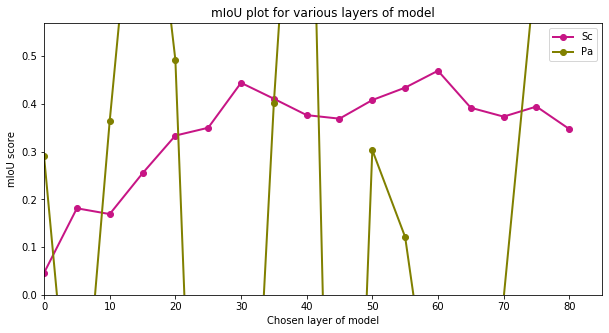

In [47]:
# df = pd.DataFrame({'x': range(0,85,5), 'Sc': miou_score,'Pa': np.random.randn(17)})
# plt.figure(figsize=(10,5))
# plt.title('mIoU plot for various layers of model')
# # plt.text()
# plt.plot( 'x', 'Sc', data=df, marker='o', color='mediumvioletred', linewidth = 2)
# plt.plot( 'x', 'Pa', data=df, marker='o', color='olive', linewidth = 2)
# plt.xlabel('Chosen layer of model')
# plt.xlim(0,85)
# plt.ylabel('mIoU score')
# plt.ylim(0,max(miou_score)+0.1)
# plt.legend()

# plt.show()

In [43]:
len(miou_score)

17

In [0]:
# import warnings
# warnings.filterwarnings("ignore")

**mIOU for SHAP**:


```
chosen_layer = 16
```


Crazing : 0.1667

Inclusion : 0.1687

Pitted Surface : 0.3363

Patches : 0.1076

Rolled-in Scale : 0.1917

Scratches : 0.2563


